# avance de evidencia 1

### repositorio del proyecto:
https://github.com/Nietsnie-beep/big_data_datos_masivos_tecmi_evidencia1

### Diagrama de datos
<div>
<p style = 'text-align:center;'>
<img src="./dataAnalisis.png">
</p>
</div>

## Hello world

In [1]:
print("Hello World")

Hello World


# Limpieza de datos

instalar dependencias

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### importar librerias

In [3]:
import pandas as pd

##### importar datasets para trabajar

In [4]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departament = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
order_product = pd.read_csv('order_products__prior.csv')


##### Realizar Diccionario a partir del csv de aisles

In [5]:

dict_csv = pd.read_csv('aisles.csv', header=None, index_col=0, squeeze=True).to_dict()

print(dict_csv)



{'aisle_id': 'aisle', '1': 'prepared soups salads', '2': 'specialty cheeses', '3': 'energy granola bars', '4': 'instant foods', '5': 'marinades meat preparation', '6': 'other', '7': 'packaged meat', '8': 'bakery desserts', '9': 'pasta sauce', '10': 'kitchen supplies', '11': 'cold flu allergy', '12': 'fresh pasta', '13': 'prepared meals', '14': 'tofu meat alternatives', '15': 'packaged seafood', '16': 'fresh herbs', '17': 'baking ingredients', '18': 'bulk dried fruits vegetables', '19': 'oils vinegars', '20': 'oral hygiene', '21': 'packaged cheese', '22': 'hair care', '23': 'popcorn jerky', '24': 'fresh fruits', '25': 'soap', '26': 'coffee', '27': 'beers coolers', '28': 'red wines', '29': 'honeys syrups nectars', '30': 'latino foods', '31': 'refrigerated', '32': 'packaged produce', '33': 'kosher foods', '34': 'frozen meat seafood', '35': 'poultry counter', '36': 'butter', '37': 'ice cream ice', '38': 'frozen meals', '39': 'seafood counter', '40': 'dog food care', '41': 'cat food care', 

C:\Users\alber\AppData\Local\Temp\ipykernel_1728\3378417576.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dict_csv = pd.read_csv('aisles.csv', header=None, index_col=0, squeeze=True).to_dict()


In [6]:
print(dict_csv['1'])

prepared soups salads


In [7]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


vamos a analizar la informacion de este dataset


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


Ahora analizar cuantos datos faltantes tenemos en este caso 206209 son datos faltantes

este paso se realiza con cada uno de los dataset

In [9]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [11]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

una vez hecho el analis de los datos podemos encontrar que hay campos en comun los cuales se pueden unir en un solo archivo
aqui se une el dataset de "asiles" con el de "products" por medio del campo en comun que en este caso es aisle_id para tenerlo en un solo archivo

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
#unir pasillo id con el producto
products = pd.merge(aisles, products, on="aisle_id")
products.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [14]:
departament.info()
departament.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


department_id    0
department       0
dtype: int64

In [15]:
departament

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
products

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20
...,...,...,...,...,...
49683,134,specialty wines champagnes,47713,Sparkling Rose,5
49684,134,specialty wines champagnes,48984,Dry Sherry,5
49685,134,specialty wines champagnes,49438,Dry Fino Sherry,5
49686,134,specialty wines champagnes,49562,Blanc De Noirs Sparkling Wine,5


In [17]:
#unir departamentos
products_merge = pd.merge(departament, products, on='department_id')
products_merge.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


In [18]:
order_product

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [19]:
products_merge

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen
...,...,...,...,...,...,...
49683,21,missing,100,missing,49553,Organic Plain Skyr
49684,21,missing,100,missing,49575,Chocolate Vanilla Malt Custard
49685,21,missing,100,missing,49641,"8\"" Pecan Pie"
49686,21,missing,100,missing,49664,Lemon Cayenne Drinking Vinegar


In [20]:
#MERGE PRODUCT ID
products_merge = pd.merge(order_product, products, on='product_id')

In [21]:
products_merge.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id
0,2,33120,1,1,86,eggs,Organic Egg Whites,16
1,26,33120,5,0,86,eggs,Organic Egg Whites,16
2,120,33120,13,0,86,eggs,Organic Egg Whites,16
3,327,33120,5,1,86,eggs,Organic Egg Whites,16
4,390,33120,28,1,86,eggs,Organic Egg Whites,16


In [22]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [23]:
#merge order id
products_merge_orders = pd.merge(products_merge, orders, on="order_id")

In [24]:
products_merge_orders.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,86,eggs,Organic Egg Whites,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,83,fresh vegetables,Michigan Organic Kale,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,104,spices seasonings,Garlic Powder,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,19,oils vinegars,Coconut Butter,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,17,baking ingredients,Natural Sweetener,13,202279,prior,3,5,9,8.0


<h1>Avance 2 evidencia 1</h1>

<h3> crear variable para saber las horas en las que mas ventas hay   </h3>

Importar librerias para mostrar las graficas

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

se creo la grafica con los valores de los datos de orders tomando en cuenta el campo de "order_hour_of_day"

<AxesSubplot: xlabel='order_hour_of_day', ylabel='count'>

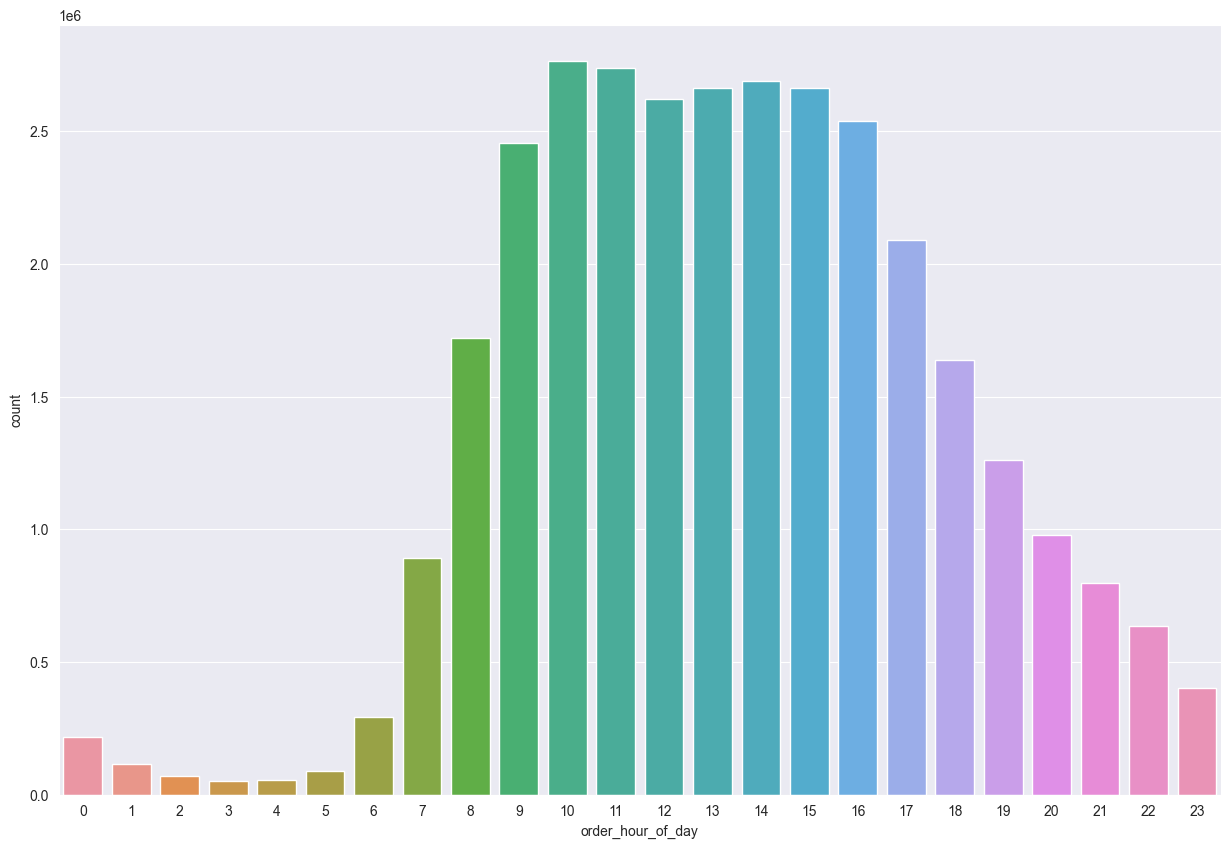

In [60]:
plt.figure(figsize=(15,10))
sns.countplot(x="order_hour_of_day", data=products_merge_orders)

en la grafica se observa que los horarios y el nivel de ventas que hay en cada hora. La grafica indica que a partir de las 10 hasta las 4 se realizan la mayor cantidad de compras

<h3>Productos principales en ventas</h3>

In [62]:
products_top_group = products_merge_orders.groupby(['product_id', 'product_name'])['reordered'].count().reset_index()
products_top = products_top_group.nlargest(15, "reordered")
products_top

,product_id,product_name,reordered
24848,24852,Banana,472565
13172,13176,Bag of Organic Bananas,379450
21133,21137,Organic Strawberries,264683
21899,21903,Organic Baby Spinach,241921
47198,47209,Organic Hass Avocado,213584
47755,47766,Organic Avocado,176815
47615,47626,Large Lemon,152657
16793,16797,Strawberries,142951
26204,26209,Limes,140627
27839,27845,Organic Whole Milk,137905


<AxesSubplot: xlabel='product_name', ylabel='reordered'>

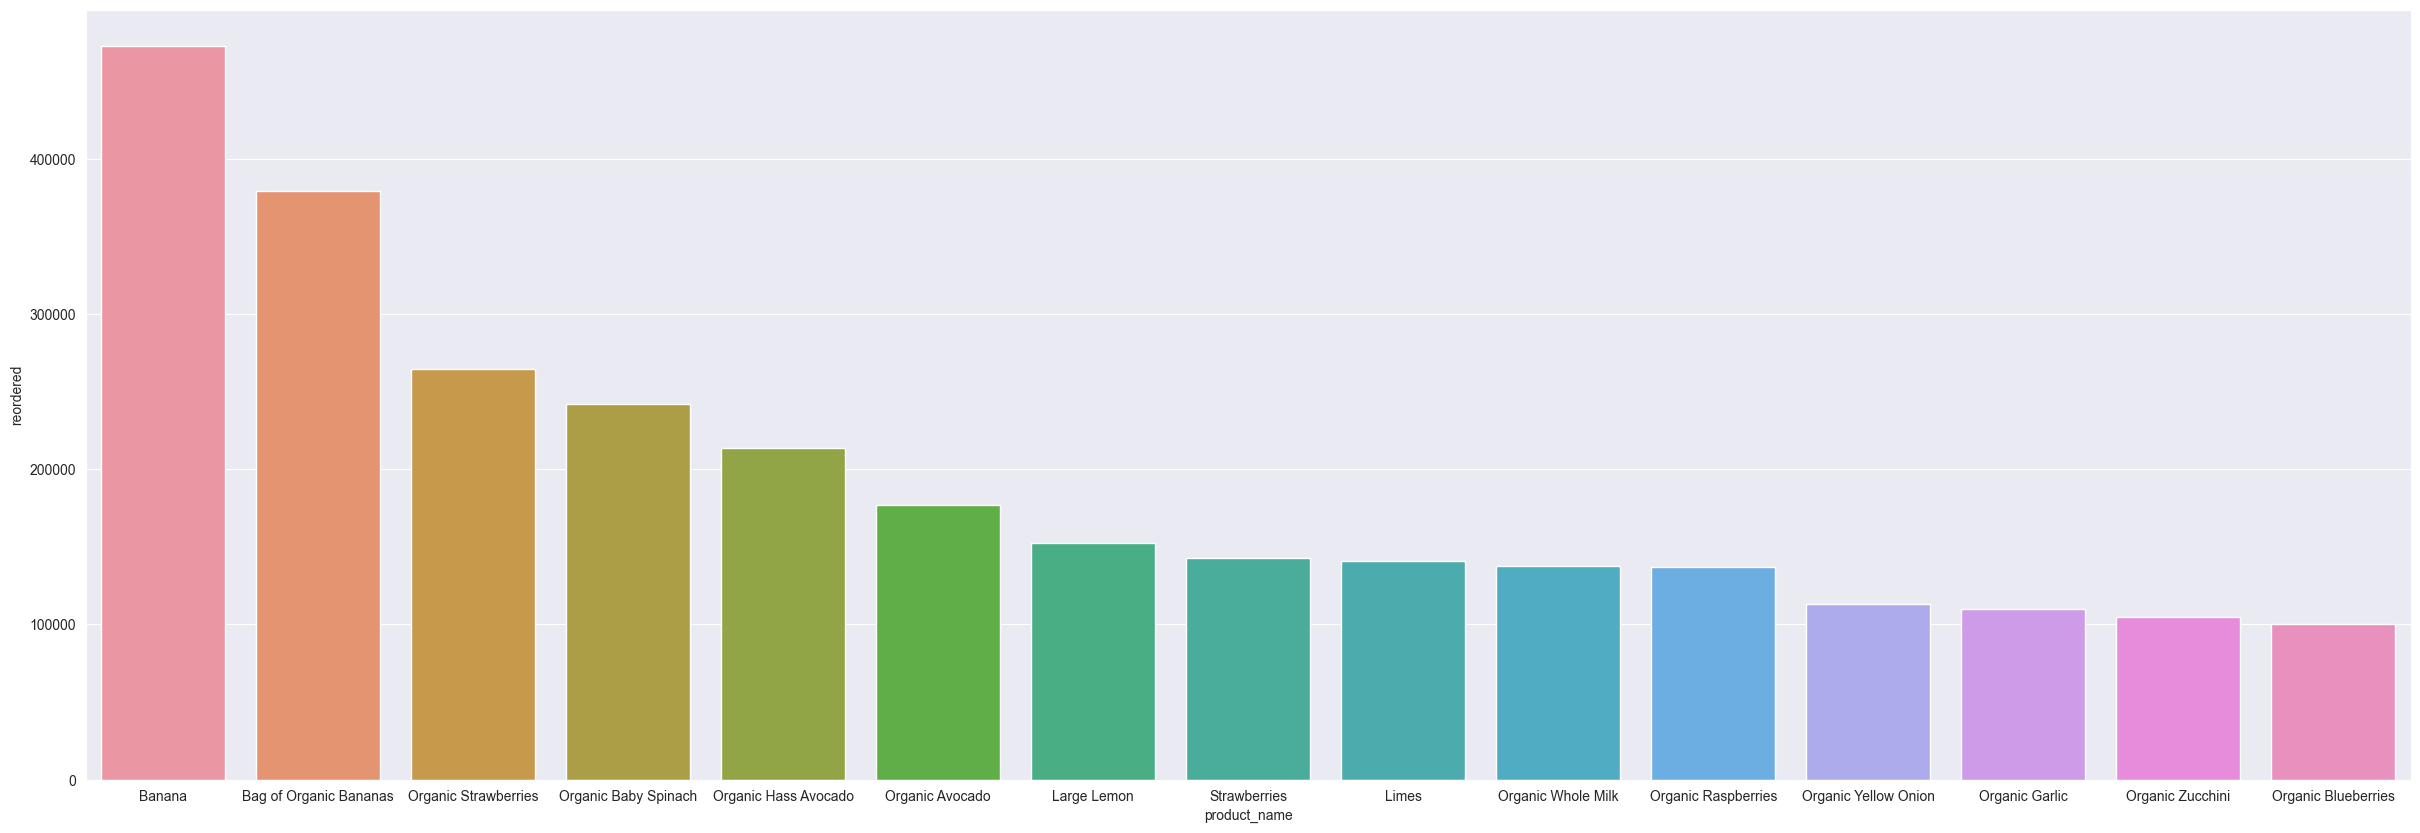

In [52]:
plt.figure(figsize=(30,10))
sns.barplot(x="product_name", y="reordered", data=products_top)


En la grafica se pueden observar los 15 productos mas vendidos segun los datos

In [32]:
products

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20
...,...,...,...,...,...
49683,134,specialty wines champagnes,47713,Sparkling Rose,5
49684,134,specialty wines champagnes,48984,Dry Sherry,5
49685,134,specialty wines champagnes,49438,Dry Fino Sherry,5
49686,134,specialty wines champagnes,49562,Blanc De Noirs Sparkling Wine,5


<h3>Que dia se vende mas?</h3>

In [44]:
days_more_purchases = products_merge_orders.groupby('order_dow',)['order_id'].count().reset_index()

days_more_purchases["percentage"]=days_more_purchases["order_id"]/days_more_purchases["order_id"].sum()

days_more_purchases.head()

,order_dow,order_id,percentage
0,0,6209666,0.191453
1,1,5665856,0.174686
2,2,4217798,0.130041
3,3,3844117,0.118519
4,4,3787215,0.116765


<AxesSubplot: xlabel='order_dow', ylabel='percentage'>

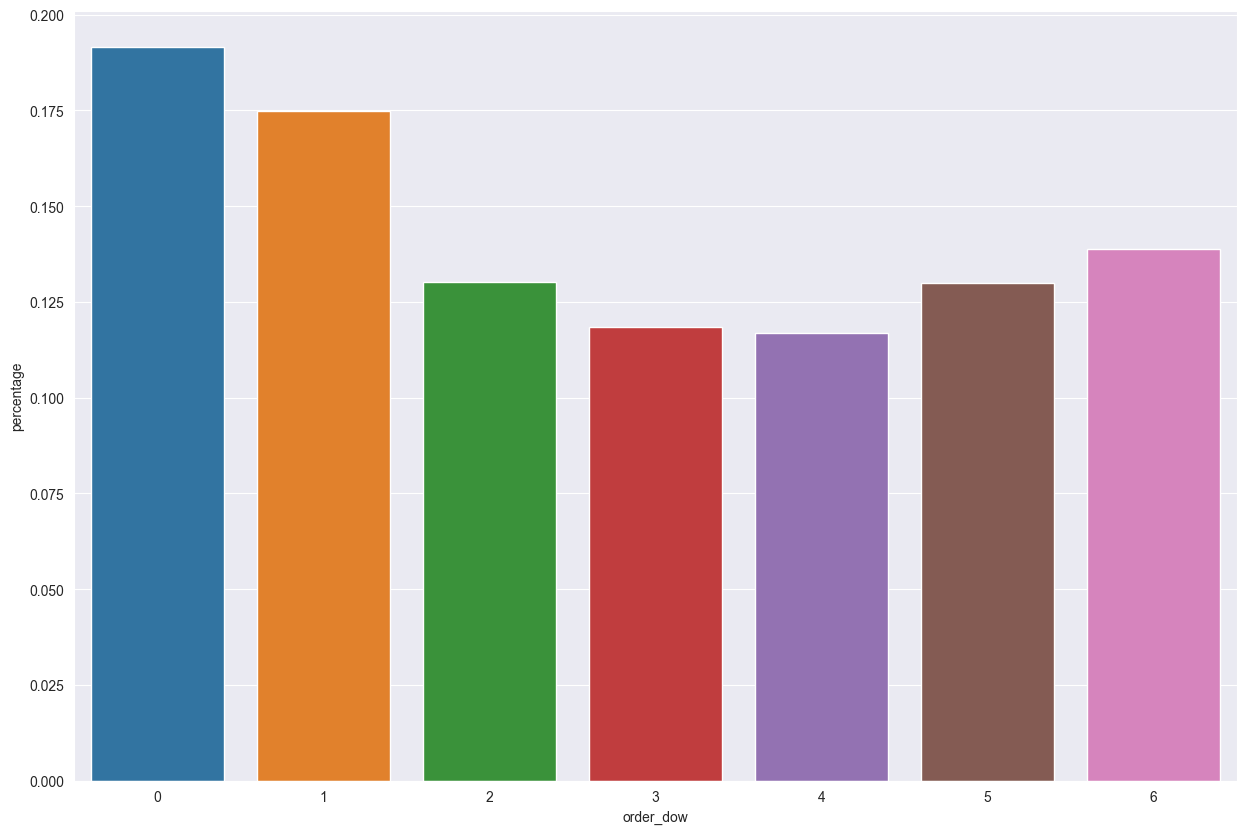

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x="order_dow", y="percentage", data=days_more_purchases)

segun la grafica los dias que mas compras se realizan son los lunes y los martes

Conclusion
En este avance pudimos llegar a la conclusion de que es mejor normalizar los datos y encontar las relaciones entre estos para concluir.

llegamos a la conclusion de que estos algorimtos pueden ser utilizados para calcular las compras a futuro para que la empresa puede basarse en estos para potenciar sus compras
